# House Price Prediction Model

In [1]:
#Importing all the libraries need.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

matplotlib.rcParams["figure.figsize"] = (20,10) #Set the size of plots

In [2]:
#Reading the CSV file
df = pd.read_csv('Bengaluru_House_Data.csv')
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [3]:
df.shape

(13320, 9)

In [4]:
#List of all the column names
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#Number of rows for each area type
new_df = df.groupby('area_type')
new_df['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#Remove unnecesery features from the dataset
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()
#Dont remove everything in here in the next step

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [7]:
#Number of unique values of each feature
df2.nunique()

location      1305
size            31
total_sqft    2117
bath            19
price         1994
dtype: int64

In [8]:
#List of unique values of bath feature
a = df.bath.unique()
a.sort()
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 18., 27., 40., nan])

In [9]:
#Get how many null values in each feature
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#Drop any null values
df3 = df2.dropna()
df3.isnull().sum()
#try to find a way to fill most of these data

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [15]:
#Get the unique values of the size feature
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
#Create the BHK feature and get the only numerical value from the size feature
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['bhk'].unique()

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_17687/1618823308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [21]:
#Checking any outliers in bhk Column
df3[df3.bhk > 20]

#Here the 43bhk one is semes odd.

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [22]:
#Check the total_sqft feature
df3['total_sqft'].unique()
#Here we can see there are some values wich are in format of a range (eg: 1133 - 1384)
#We have to convert those values to a single value

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
# This function tries to convert X value to a float. If it can, reurn will be True. If it couldn't retun False

In [27]:
#Here are all the non numerical values in total_sqft column
df3[~df3['total_sqft'].apply(isFloat)]

location   size   total_sqft  bath    price  bhk
30              Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122                Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137    8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165              Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188              KR Puram  2 BHK  1015 - 1540   2.0   56.800    2
...                   ...    ...          ...   ...      ...  ...
12975          Whitefield  2 BHK   850 - 1060   2.0   38.190    2
12990      Talaghattapura  3 BHK  1804 - 2273   3.0  122.000    3
13059              Harlur  2 BHK  1200 - 1470   2.0   72.760    2
13265               Hoodi  2 BHK  1133 - 1384   2.0   59.135    2
13299          Whitefield  4 BHK  2830 - 2882   5.0  154.500    4

[190 rows x 6 columns]

In [49]:
#Convert those non numerical values in to numerical
def convertSqft(x):
    token = x.split('-')
    if len(token) == 2 :  
        average = ( float(token[0]) + float(token[1]) ) / 2
        return average
    try:
        return float(x)
    except:
        return x

In [52]:
convertSqft("22")

22.0

In [77]:
df4 = df3.copy()

In [78]:
df4['total_sqft'] = df4['total_sqft'].apply(convertSqft)
df4[~df4['total_sqft'].apply(isFloat)]
# Here are the values that totla_sqft is not represented as a flot now
#Now tou can delete these rows, But also you can convert these values too.

location       size  \
410                                         Kengeri      1 BHK   
648                                         Arekere  9 Bedroom   
775                                    Basavanagara      1 BHK   
872                               Singapura Village      2 BHK   
1019                                 Marathi Layout  1 Bedroom   
1086                                     Narasapura  2 Bedroom   
1400                                     Chamrajpet      9 BHK   
1712                               Singena Agrahara  3 Bedroom   
1743                                      Hosa Road      3 BHK   
1821                                       Sarjapur  3 Bedroom   
2310                                     Whitefield      4 BHK   
2881                             Volagerekallahalli      2 BHK   
3228                                Dodda Banaswadi  5 Bedroom   
3285                                     Whitefield  4 Bedroom   
4113                                     BTM Layout      3 BHK   
4293                              Bannerghatta Road      4 BHK   
5453                                         Kannur  6 Bedroom   
5537                                    Frazer Town      3 BHK   
5631                                    Thanisandra      3 BHK   
5668                                Judicial Layout  5 Bedroom   
5708                                         Jigani  4 Bedroom   
5976                             1st Phase JP Nagar      1 BHK   
6268                                       Chickpet      2 BHK   
6303                                       JP Nagar      3 BHK   
6333                                      Harohalli  2 Bedroom   
6552            5 Bedroom Farm House in Lakshmipura  5 Bedroom   
6592                                  Langford Town      4 BHK   
6953                                      Hosa Road      3 BHK   
7001                               Thyagaraja Nagar  8 Bedroom   
7248                                       Hulimavu      2 BHK   
7334                                 Kanakpura Road  1 Bedroom   
7520                                  Doddaballapur      3 BHK   
7607                                   Bommenahalli  3 Bedroom   
7726                                 Kanakpura Road  1 Bedroom   
8273                                      V.V Puram      3 BHK   
9423                               Ramamurthy Nagar  1 Bedroom   
9519                                   Bommenahalli  3 Bedroom   
9734                             Yelahanka New Town      1 BHK   
10488  2 Bedroom Furnished Farm House in Kolar Road  2 Bedroom   
10491                                      Rajapura      2 BHK   
11320                                 Arishinakunte  1 Bedroom   
11615                                         arudi  3 Bedroom   
12186                            7th Phase JP Nagar      2 BHK   
12252                                  Gowdanapalya      5 BHK   
12560                                     Hosa Road      3 BHK   
12652                              Billamaranahalli  2 Bedroom   

            total_sqft  bath   price  bhk  
410     34.46Sq. Meter   1.0   18.50    1  
648          4125Perch   9.0  265.00    9  
775      1000Sq. Meter   2.0   93.00    1  
872      1100Sq. Yards   2.0   45.00    2  
1019         5.31Acres   1.0  110.00    1  
1086           30Acres   2.0   29.50    2  
1400      716Sq. Meter   9.0  296.00    9  
1712     1500Sq. Meter   3.0   95.00    3  
1743   142.61Sq. Meter   3.0  115.00    3  
1821     1574Sq. Yards   3.0   76.00    3  
2310   361.33Sq. Yards   4.0  270.00    4  
2881      117Sq. Yards   2.0   38.00    2  
3228     3040Sq. Meter   5.0  140.00    5  
3285      500Sq. Yards   4.0  378.00    4  
4113      167Sq. Meter   3.0   10.00    3  
4293      315Sq. Yards   5.0  260.00    4  
5453            3Cents   6.0   75.00    6  
5537   188.89Sq. Yards   3.0  180.00    3  
5631      204Sq. Meter   4.0  185.00    3  
5668       45Sq. Yards   6.0  400.00    5  
5708    133.3Sq.

In [79]:
#Removing all the non ne=umerical values from the total_sqft feature
df5 = df4[df4['total_sqft'].apply(isFloat)]

In [80]:
#Creating anew feature called price_pre_sqft
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_17687/1529234579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']


location       size total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK     1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK     1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK     1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK     1200.0   2.0   51.00    2   
...                         ...        ...        ...   ...     ...  ...   
13315                Whitefield  5 Bedroom     3453.0   4.0  231.00    5   
13316             Richards Town      4 BHK     3600.0   5.0  400.00    4   
13317     Raja Rajeshwari Nagar      2 BHK     1141.0   2.0   60.00    2   
13318           Padmanabhanagar      4 BHK     4689.0   4.0  488.00    4   
13319              Doddathoguru      1 BHK      550.0   1.0   17.00    1   

      price_per_sqft  
0        3699.810606  
1        4615.384615  
2        4305.555556  
3        6245.890861  
4             4250.0  
...              ...  
13315    6689.834926  
13316   11111.111111  
13317    5258.545136  
13318   10407.336319  
13319    3090.909091  

[13200 rows x 7 columns]

In [81]:
#Checking the number of values in each location
df5.location = df5.location.apply(lambda x: x.strip())

loaction_status = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loaction_status

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_17687/3028079352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: x.strip())


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [82]:
#If the x of loaction_status is less than 10, just then return the value 'other'
def locationCleaner(x):
    if loaction_status[x] >= 10:
        return x
    else:
        return 'other'

In [83]:
#Change each location which has less than 10 data points to other
df5.location = df5.location.apply(locationCleaner)

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_17687/305629728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(locationCleaner)


In [86]:
loaction_status_new = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loaction_status_new

location
other                   2732
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
                        ... 
Nagadevanahalli           10
Naganathapura             10
Sector 1 HSR Layout       10
Nagappa Reddy Layout      10
Basapura                  10
Name: location, Length: 255, dtype: int64

## Outlier removel

In [87]:
#Finding any properties that's sqft per bhk
df5[df5.total_sqft / df5.bhk < 300]
# Here we get properties that are too small to live in.
# These may be inserted by mistake
# Or they could be illigel properties
# Any way we have to clean these up to create a genaric model

location       size total_sqft  bath  price  bhk  \
9                    other  6 Bedroom     1020.0   6.0  370.0    6   
45              HSR Layout  8 Bedroom      600.0   9.0  200.0    8   
58           Murugeshpalya  6 Bedroom     1407.0   4.0  150.0    6   
68     Devarachikkanahalli  8 Bedroom     1350.0   7.0   85.0    8   
70                   other  3 Bedroom      500.0   3.0  100.0    3   
...                    ...        ...        ...   ...    ...  ...   
13277                other  7 Bedroom     1400.0   7.0  218.0    7   
13279                other  6 Bedroom     1200.0   5.0  130.0    6   
13281      Margondanahalli  5 Bedroom     1375.0   5.0  125.0    5   
13303       Vidyaranyapura  5 Bedroom      774.0   5.0   70.0    5   
13311     Ramamurthy Nagar  7 Bedroom     1500.0   9.0  250.0    7   

      price_per_sqft  
9       36274.509804  
45      33333.333333  
58       10660.98081  
68       6296.296296  
70           20000.0  
...              ...  
13277   15571.428571  
13279   10833.333333  
13281    9090.909091  
13303    9043.927649  
13311   16666.666667  

[744 rows x 7 columns]

In [89]:
#Remove all the outlier properties using sqft per bhk

df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6

location       size total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK     1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom     2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK     1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK     1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK     1200.0   2.0   51.00    2   
...                         ...        ...        ...   ...     ...  ...   
13315                Whitefield  5 Bedroom     3453.0   4.0  231.00    5   
13316                     other      4 BHK     3600.0   5.0  400.00    4   
13317     Raja Rajeshwari Nagar      2 BHK     1141.0   2.0   60.00    2   
13318           Padmanabhanagar      4 BHK     4689.0   4.0  488.00    4   
13319              Doddathoguru      1 BHK      550.0   1.0   17.00    1   

      price_per_sqft  
0        3699.810606  
1        4615.384615  
2        4305.555556  
3        6245.890861  
4             4250.0  
...              ...  
13315    6689.834926  
13316   11111.111111  
13317    5258.545136  
13318   10407.336319  
13319    3090.909091  

[12456 rows x 7 columns]

In [93]:
#Get stats of the price_per_sqft feature
df6.price_per_sqft.describe()

count     12456.0
unique     7340.0
top        5000.0
freq        146.0
Name: price_per_sqft, dtype: float64

In [94]:
# catogorize the df by the location and get the mean and standard deviation for each location
# The the select all the pps values that are apear in 1std from the mean.
# combine all values for each location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft < (mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [95]:
df7 = remove_pps_outliers(df6)
df7

location       size total_sqft  bath   price  bhk  \
0      1st Block Jayanagar      4 BHK     2850.0   4.0  428.00    4   
1      1st Block Jayanagar      3 BHK     1630.0   3.0  194.00    3   
2      1st Block Jayanagar      3 BHK     1875.0   2.0  235.00    3   
3      1st Block Jayanagar      3 BHK     1200.0   2.0  130.00    3   
4      1st Block Jayanagar      2 BHK     1235.0   2.0  148.00    2   
...                    ...        ...        ...   ...     ...  ...   
10217                other      2 BHK     1353.0   2.0  110.00    2   
10218                other  1 Bedroom      812.0   1.0   26.00    1   
10219                other      3 BHK     1440.0   2.0   63.93    3   
10220                other      2 BHK     1075.0   2.0   48.00    2   
10221                other      4 BHK     3600.0   5.0  400.00    4   

      price_per_sqft  
0        15017.54386  
1       11901.840491  
2       12533.333333  
3       10833.333333  
4       11983.805668  
...              ...  
10217    8130.081301  
10218    3201.970443  
10219    4439.583333  
10220    4465.116279  
10221   11111.111111  

[10222 rows x 7 columns]

In [122]:
#this function vreates scatterplot for a givven location
#Scatter plot plots the 2bhk and 3bhk propertie's total sqft vs price
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (5, 2.5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color = 'green', label='3BHK', s=50)
    
    plt.xlabel("Total Squarefeet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

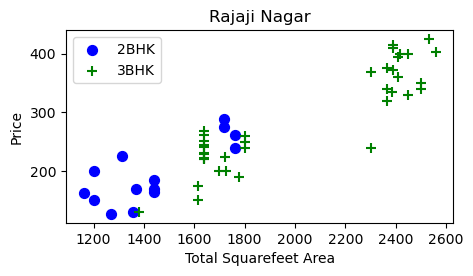

In [123]:
plot_scatter_chart(df7, 'Rajaji Nagar')
#Here in this scatter plot we can see there are some 3BHK properties that are less worth than the 2BHK properties.
#These coule be outliers.
#Here we have only plot the 2bhk and 3bhk.
#But there could be errors in 4,5,6 BHK too.

In [124]:
df7.location.unique

<bound method Series.unique of 0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10217                  other
10218                  other
10219                  other
10220                  other
10221                  other
Name: location, Length: 10222, dtype: object>

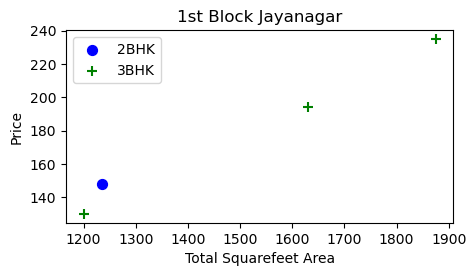

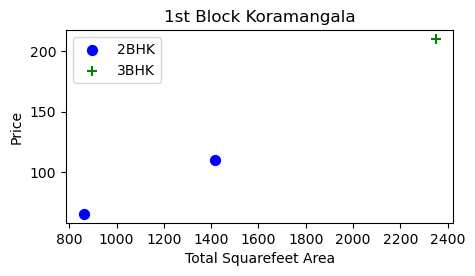

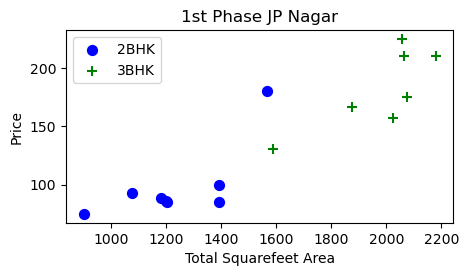

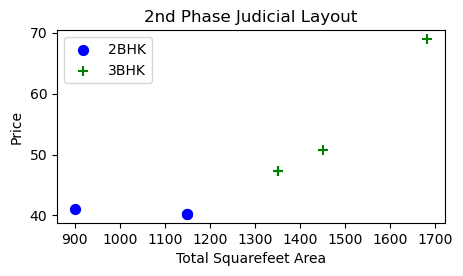

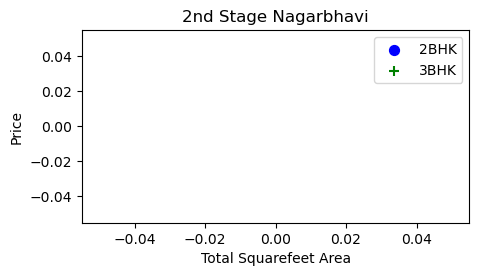

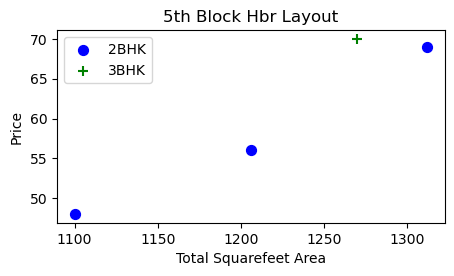

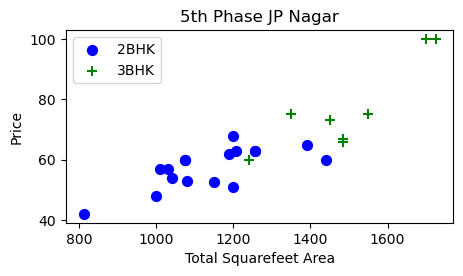

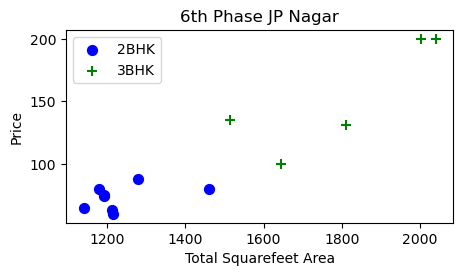

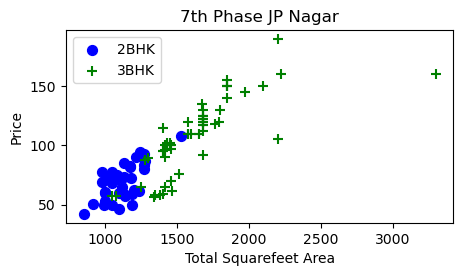

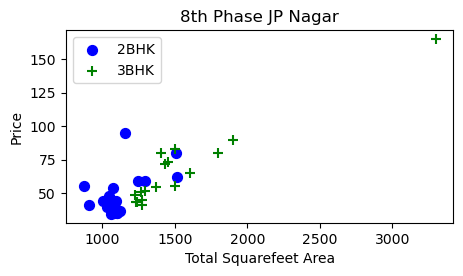

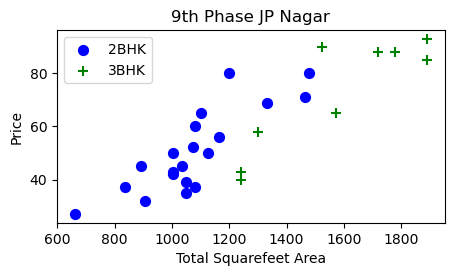

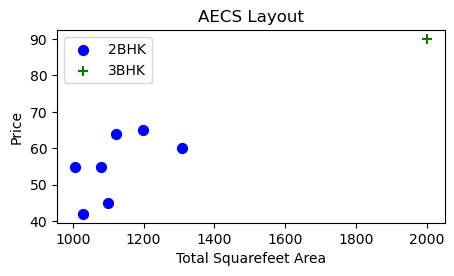

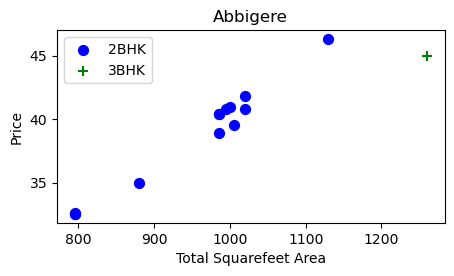

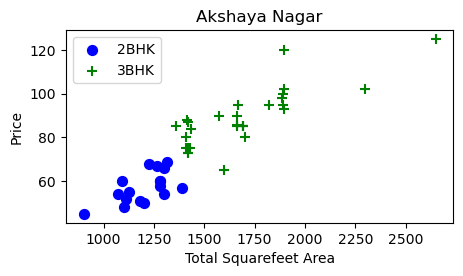

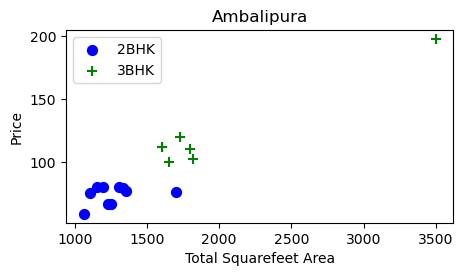

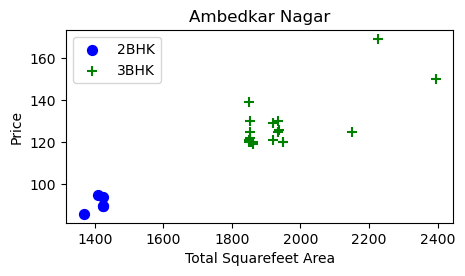

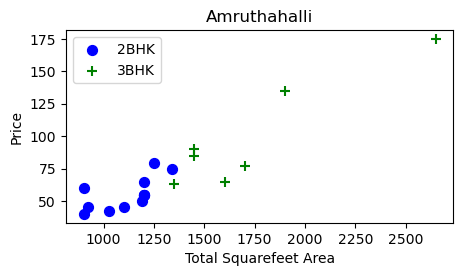

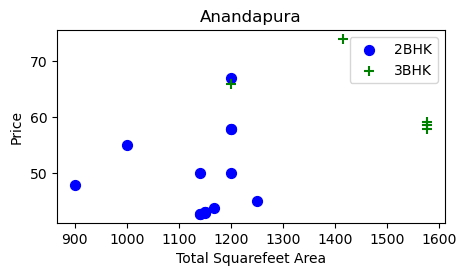

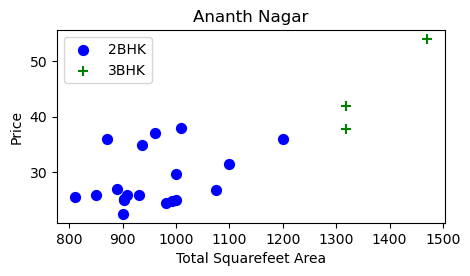

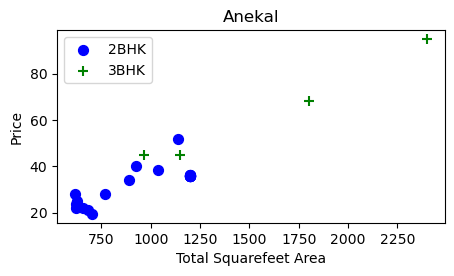

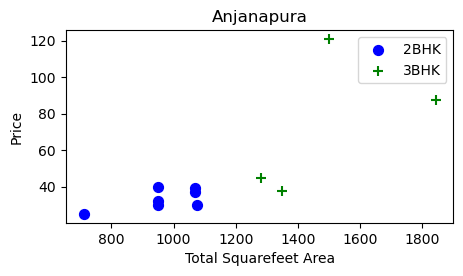

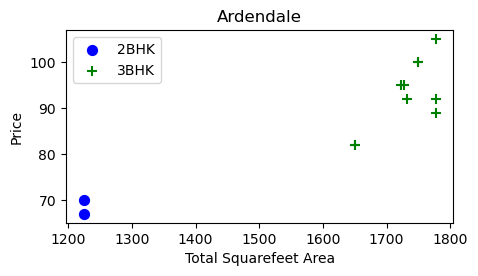

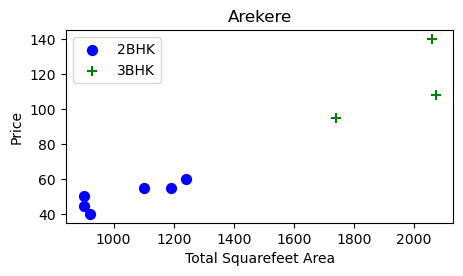

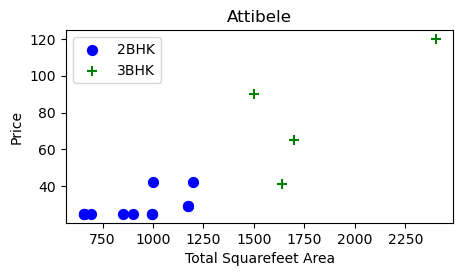

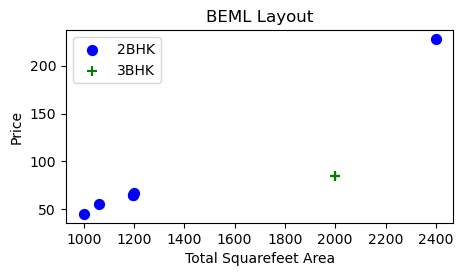

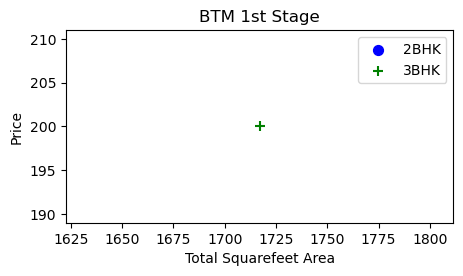

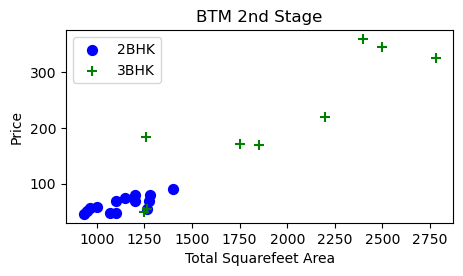

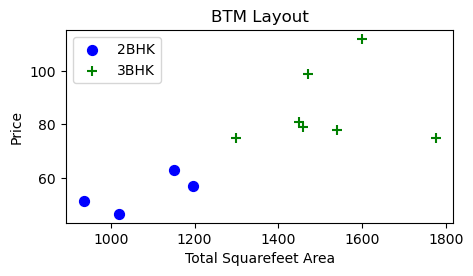

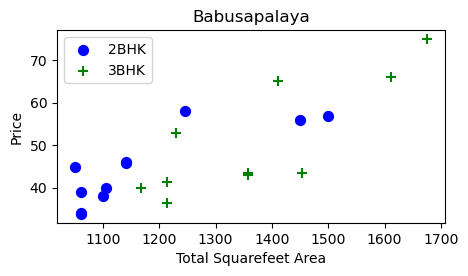

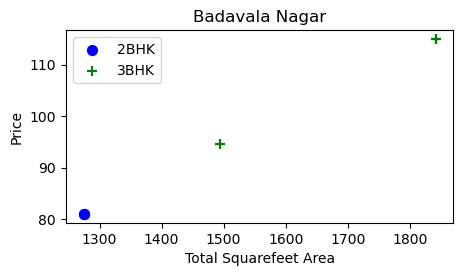

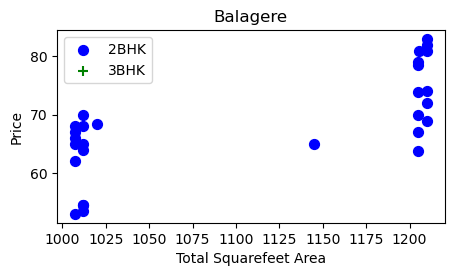

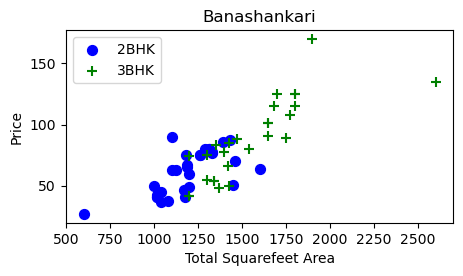

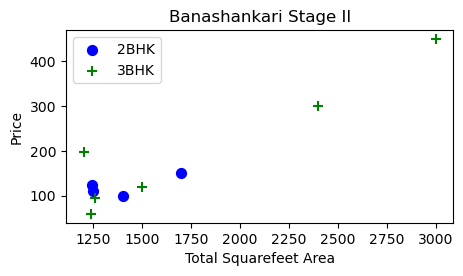

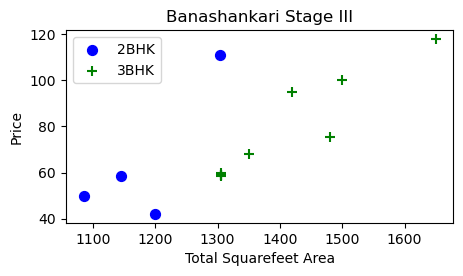

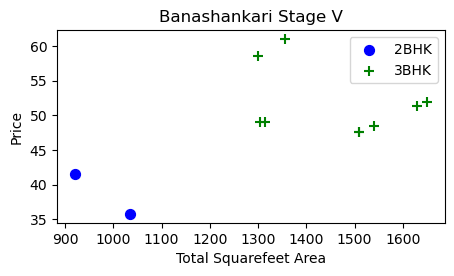

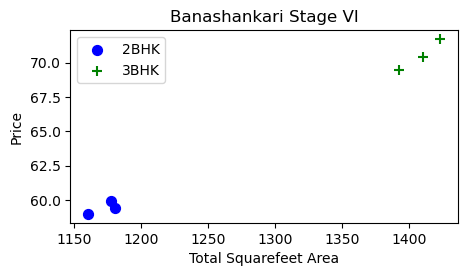

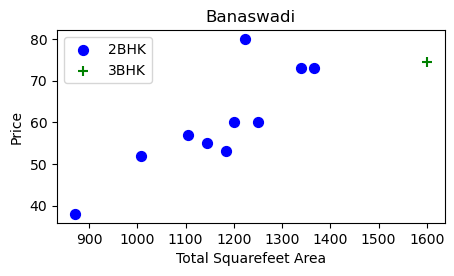

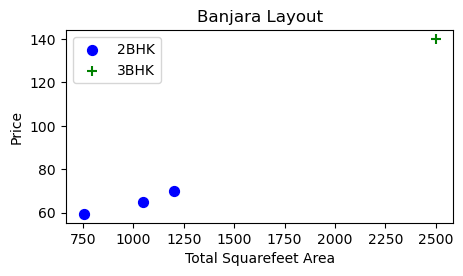

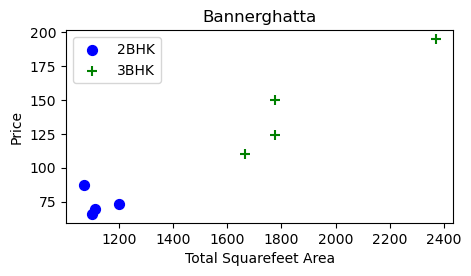

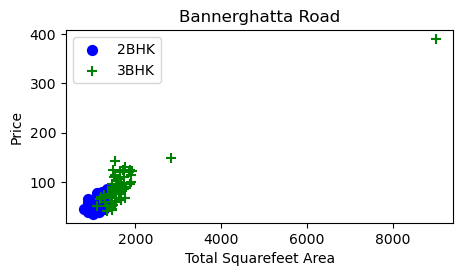

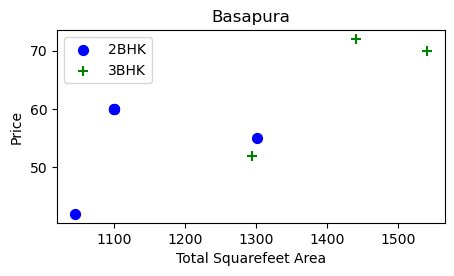

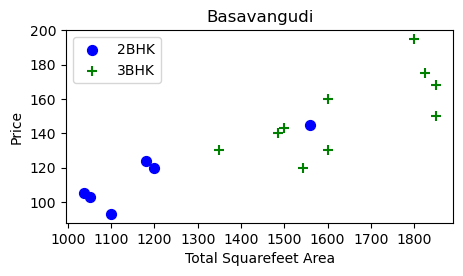

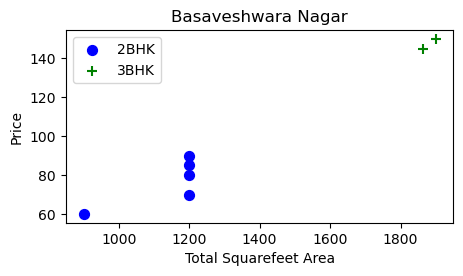

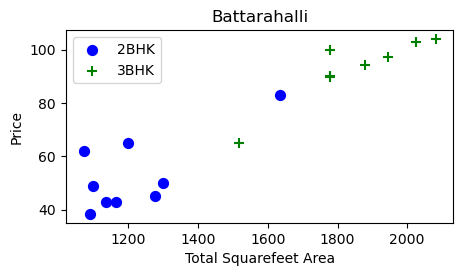

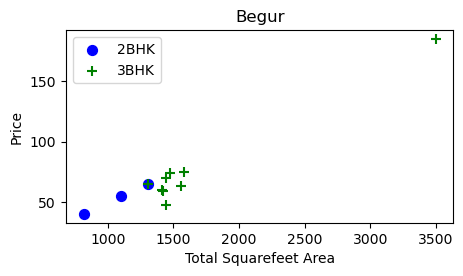

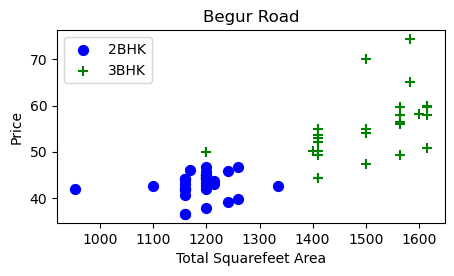

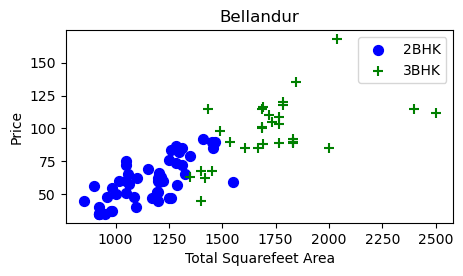

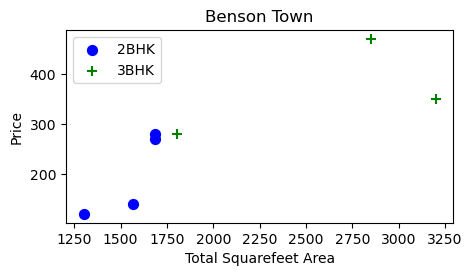

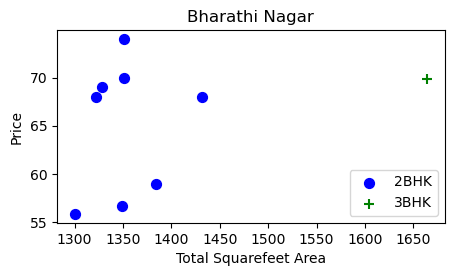

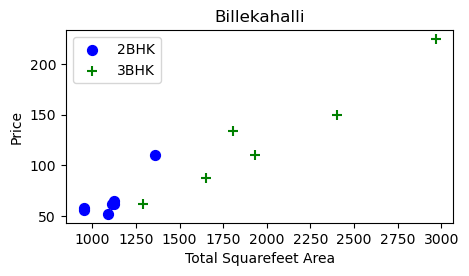

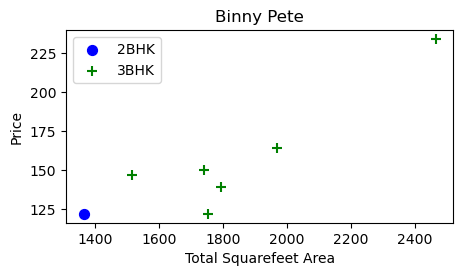

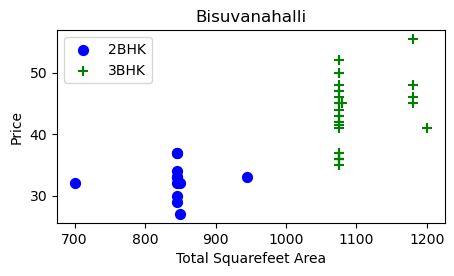

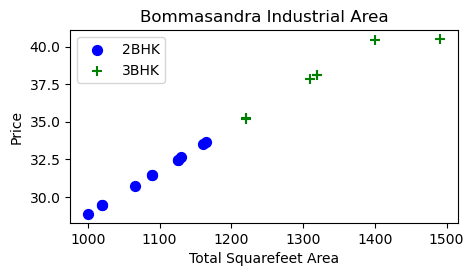

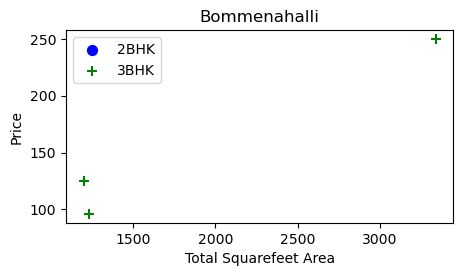

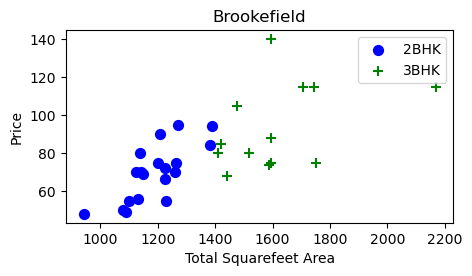

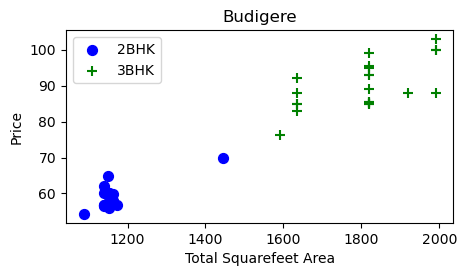

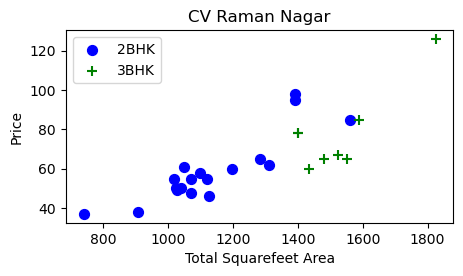

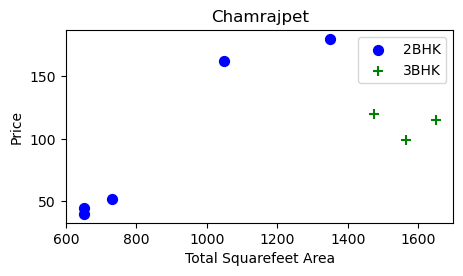

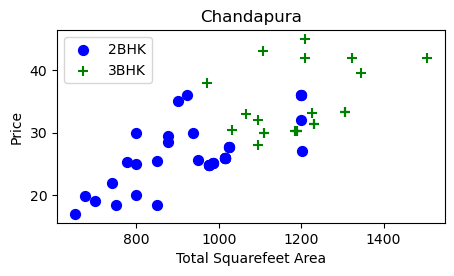

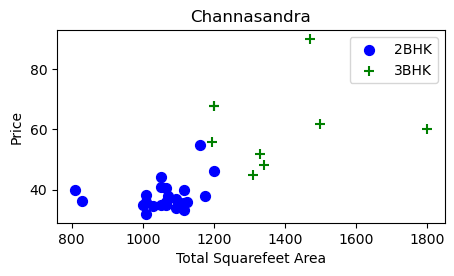

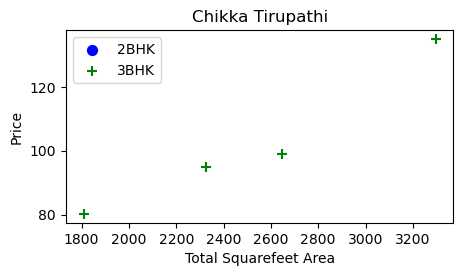

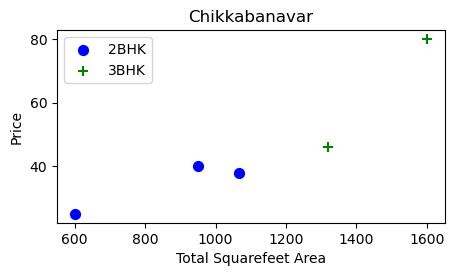

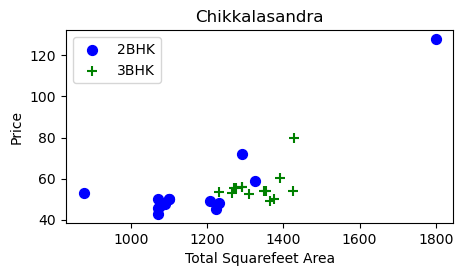

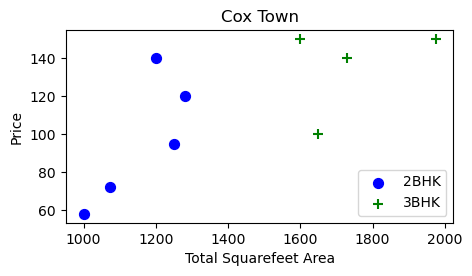

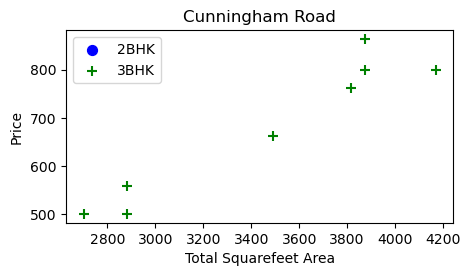

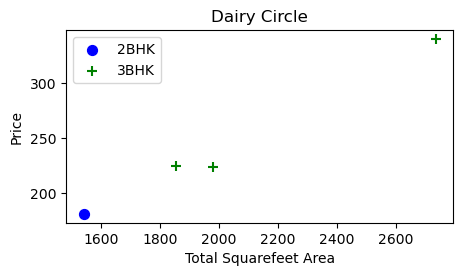

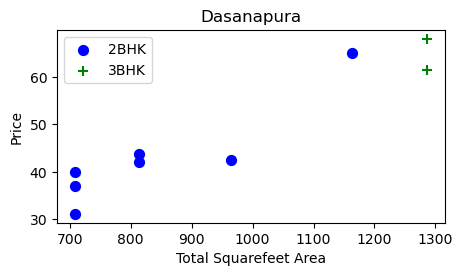

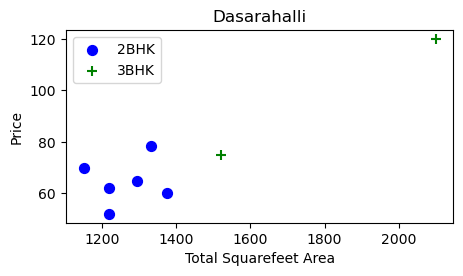

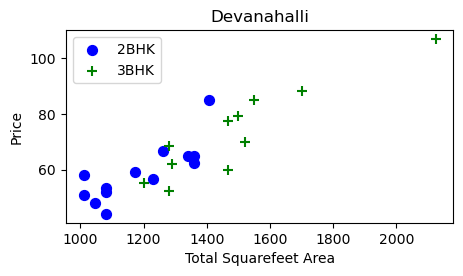

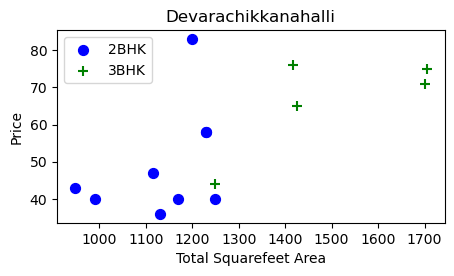

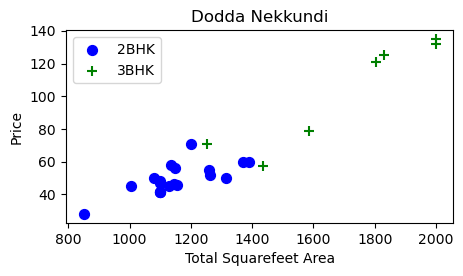

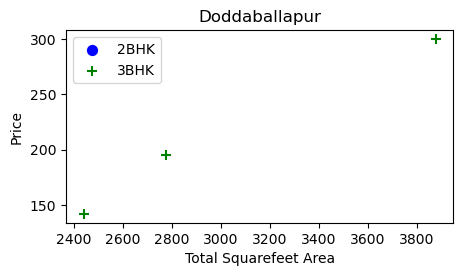

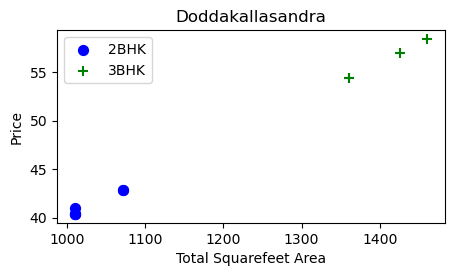

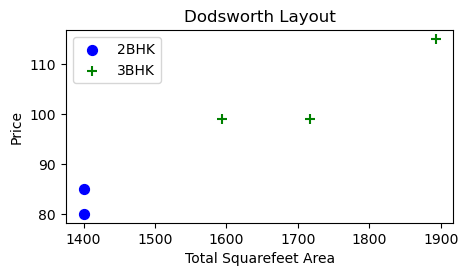

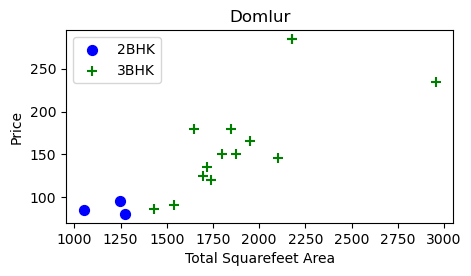

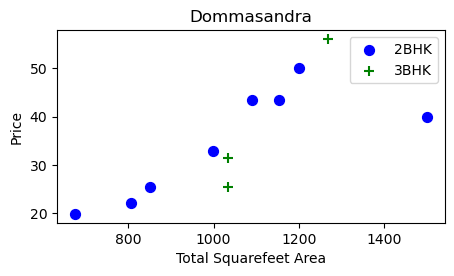

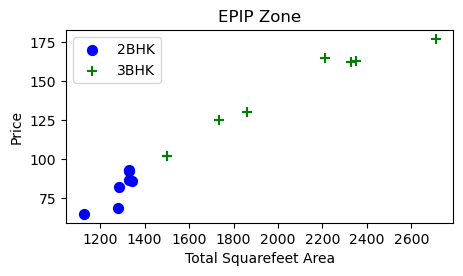

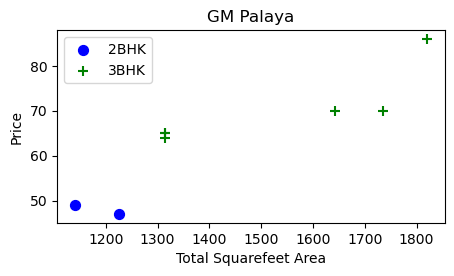

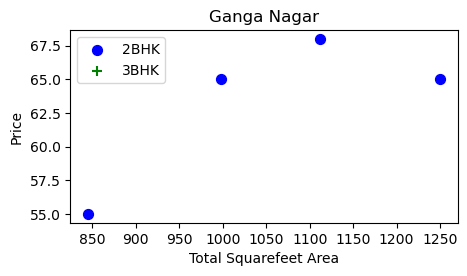

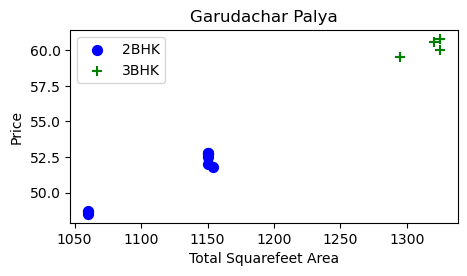

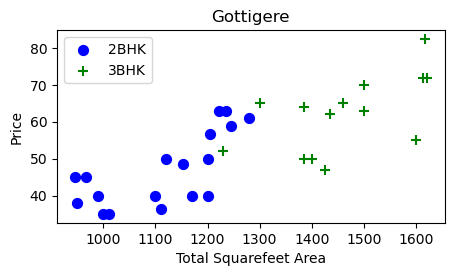

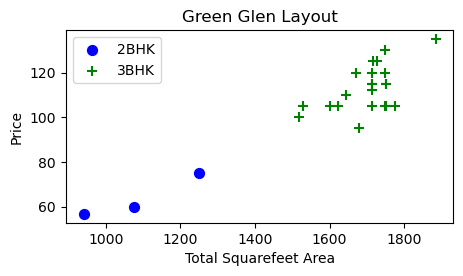

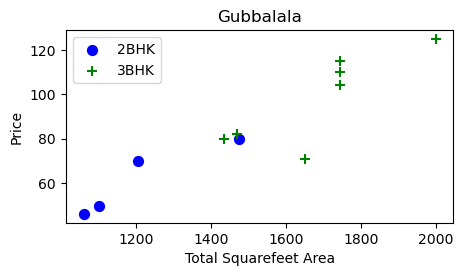

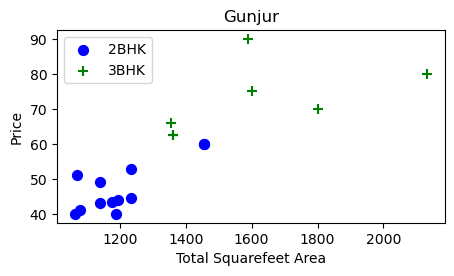

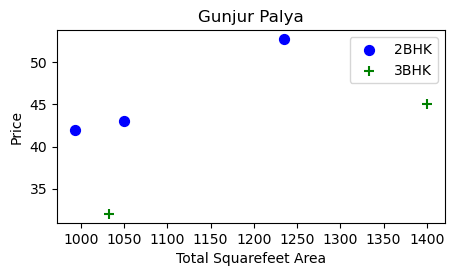

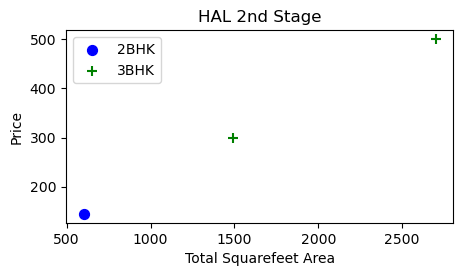

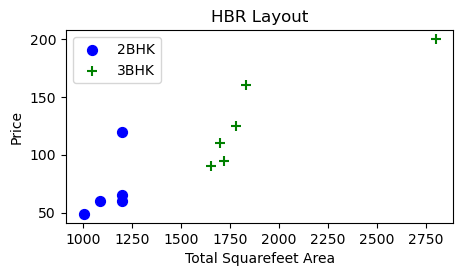

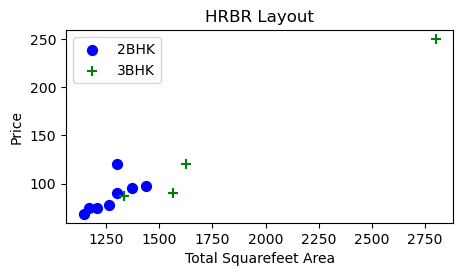

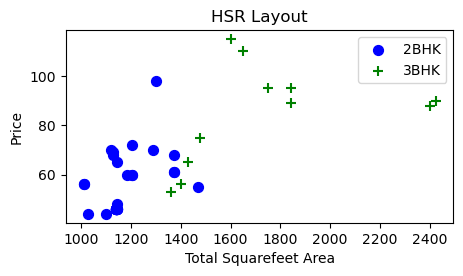

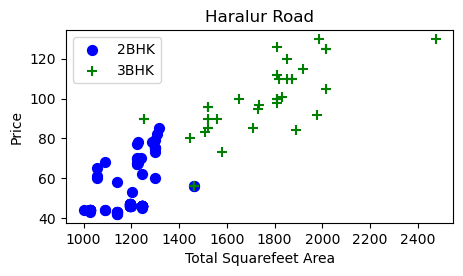

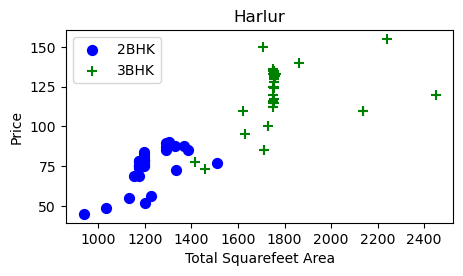

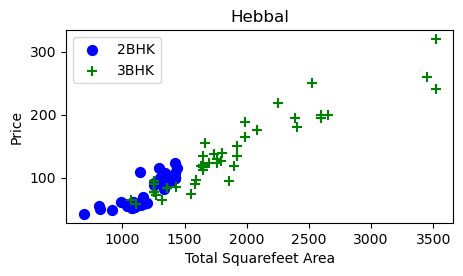

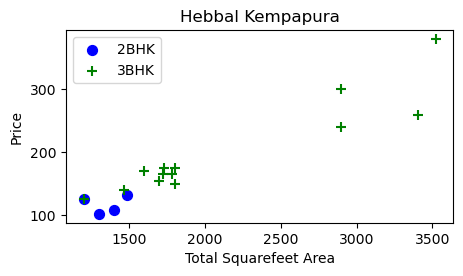

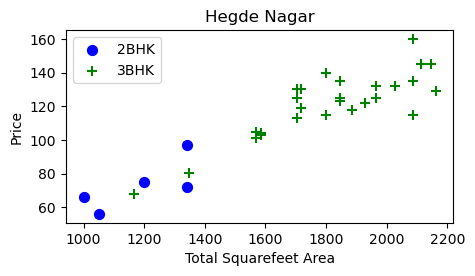

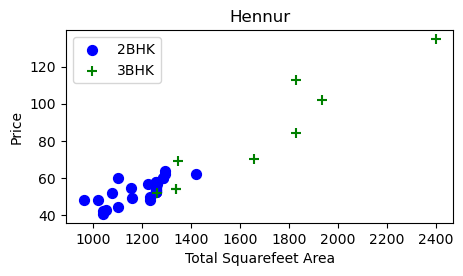

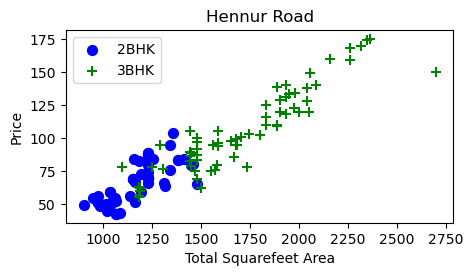

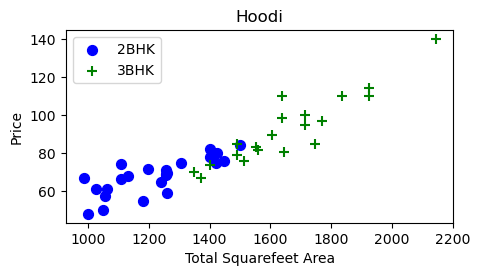

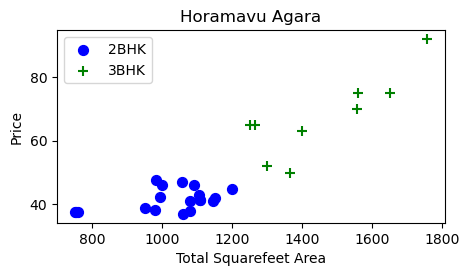

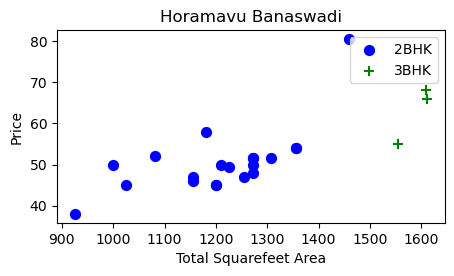

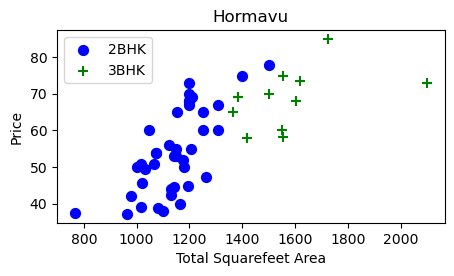

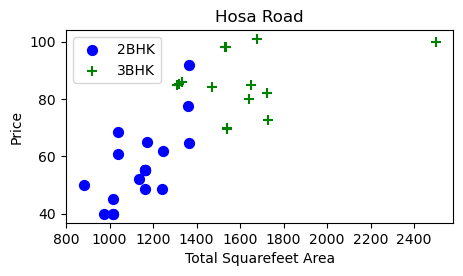

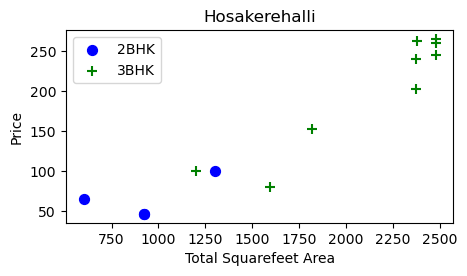

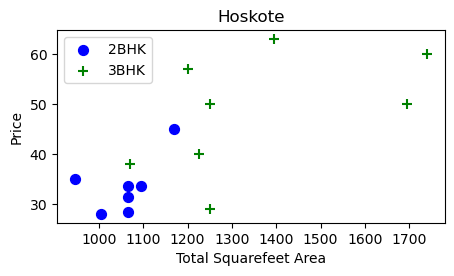

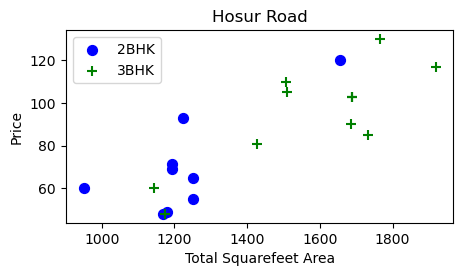

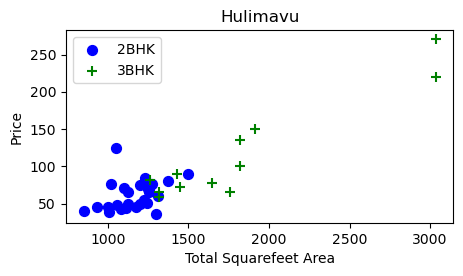

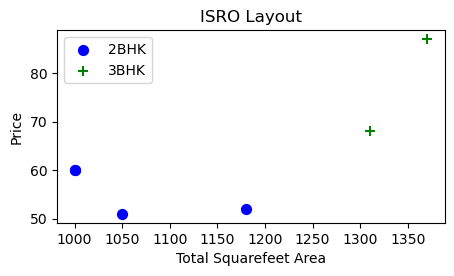

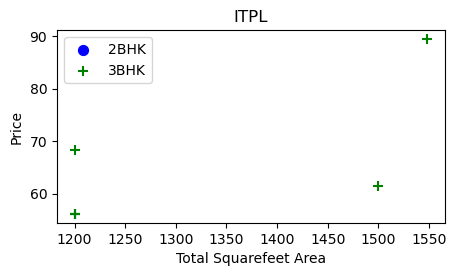

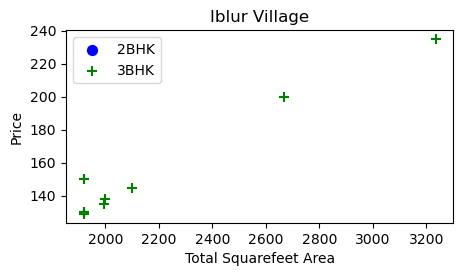

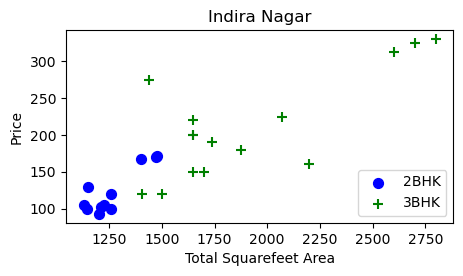

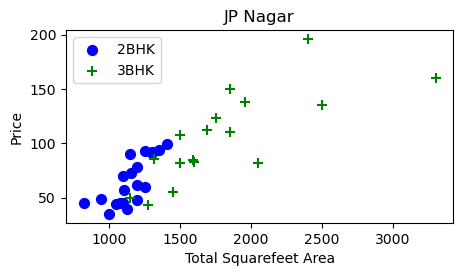

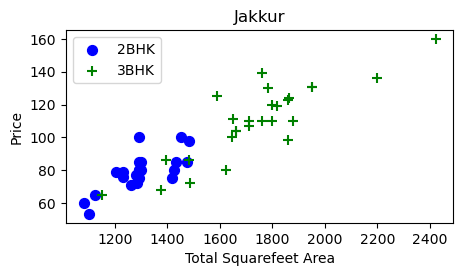

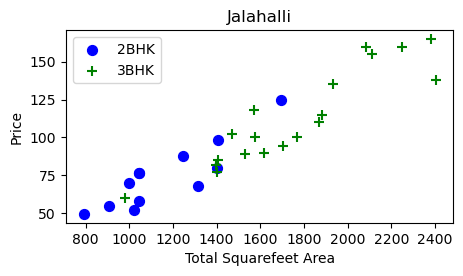

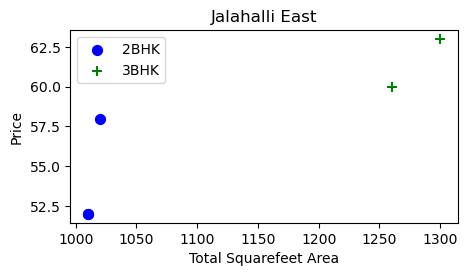

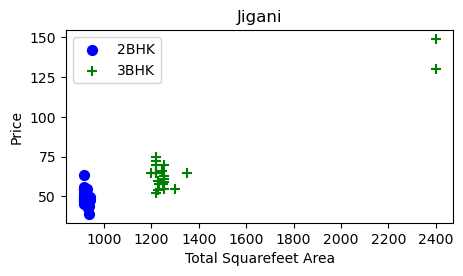

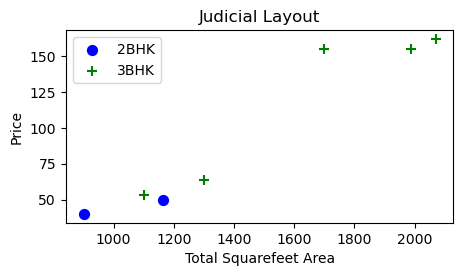

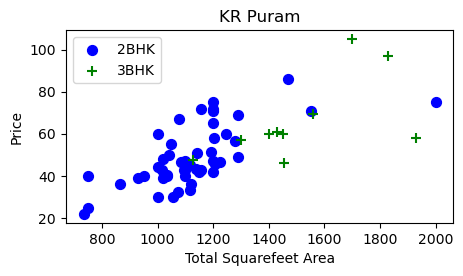

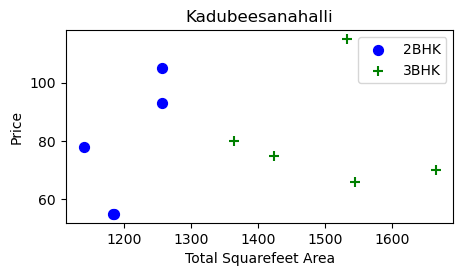

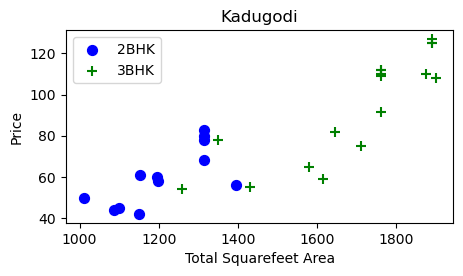

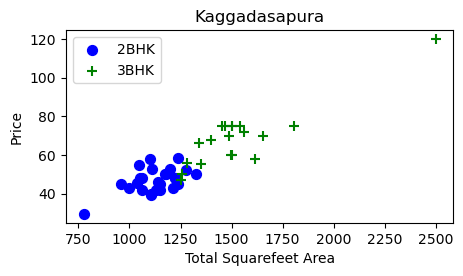

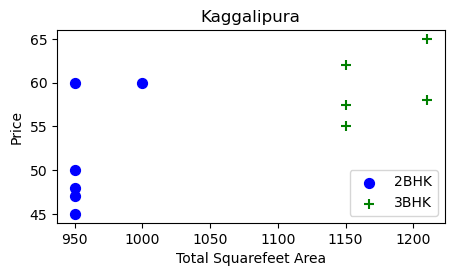

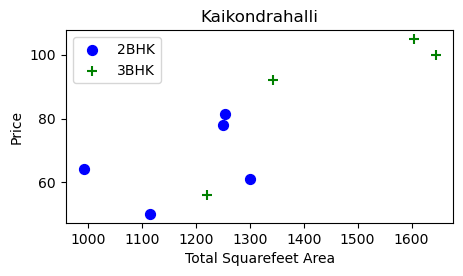

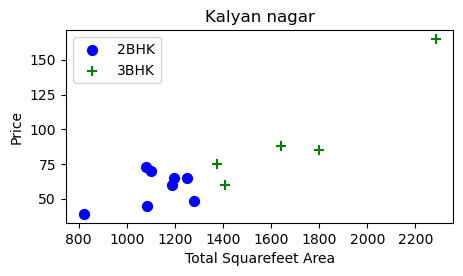

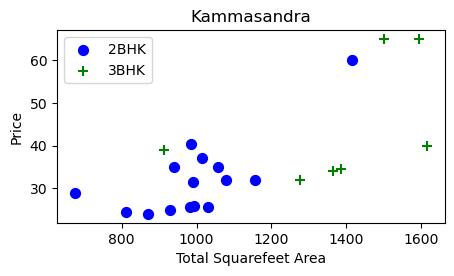

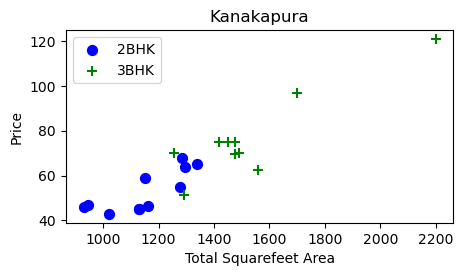

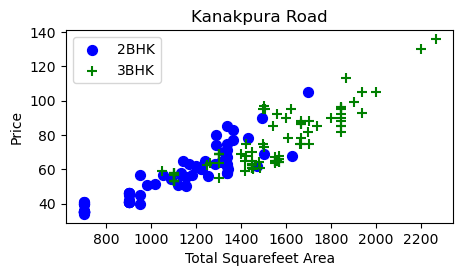

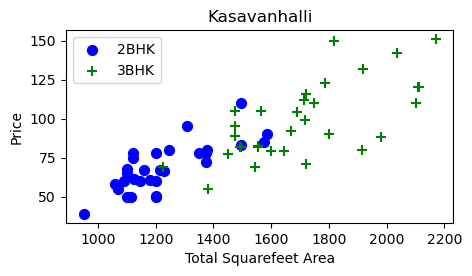

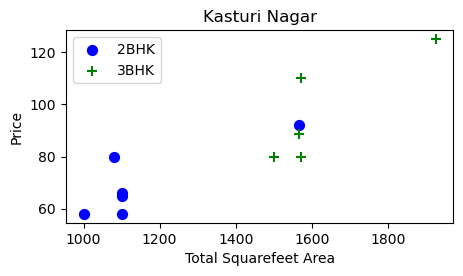

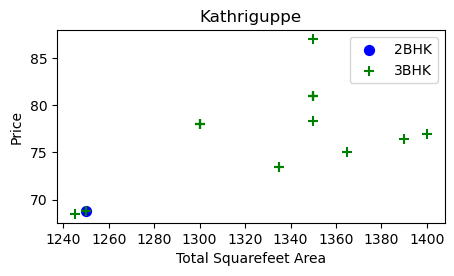

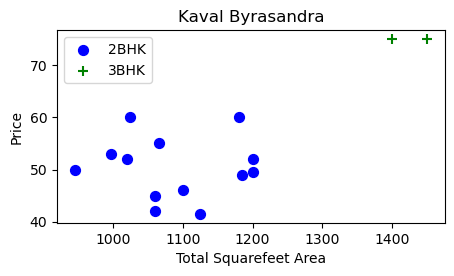

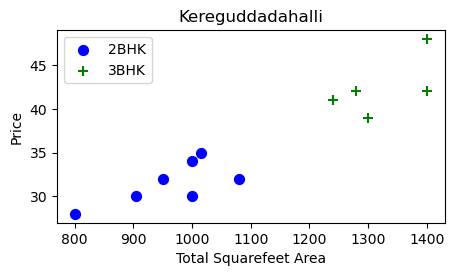

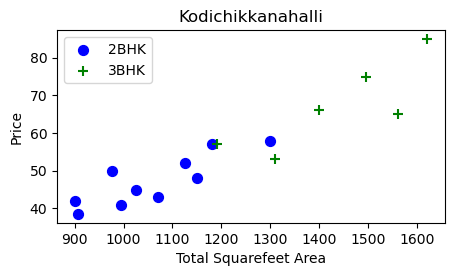

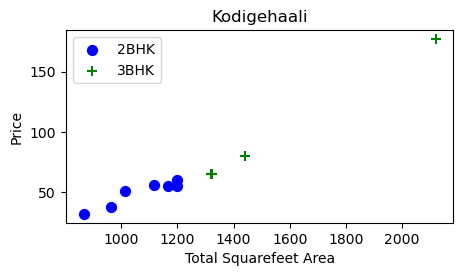

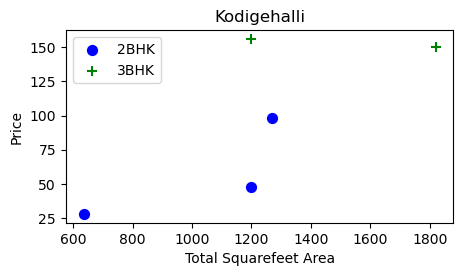

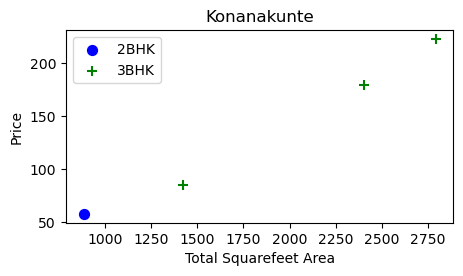

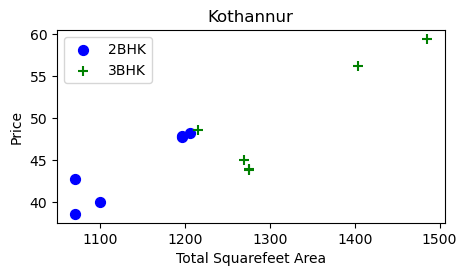

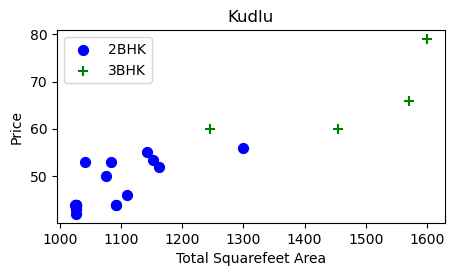

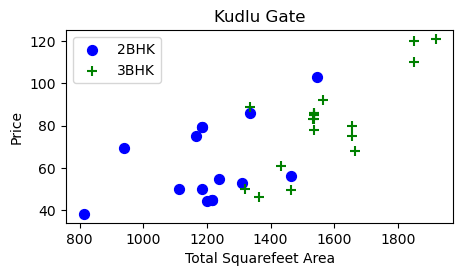

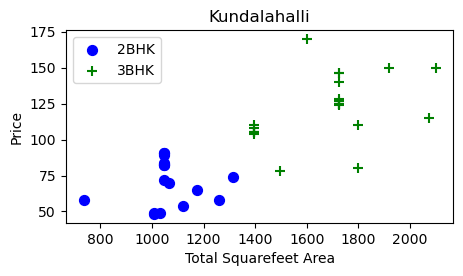

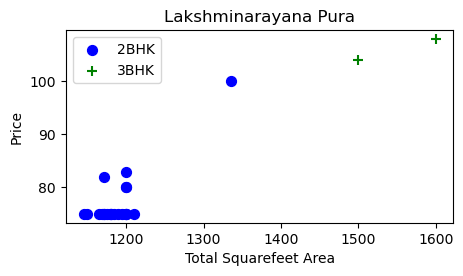

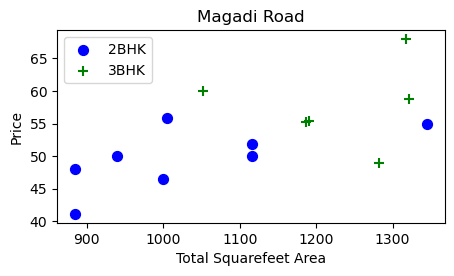

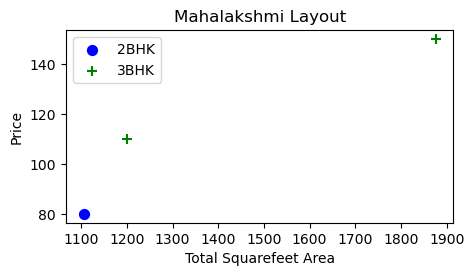

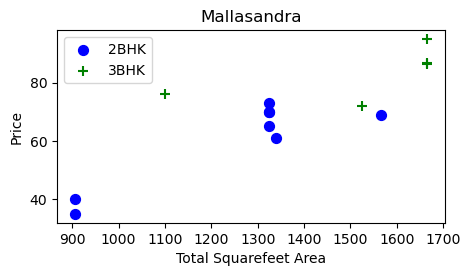

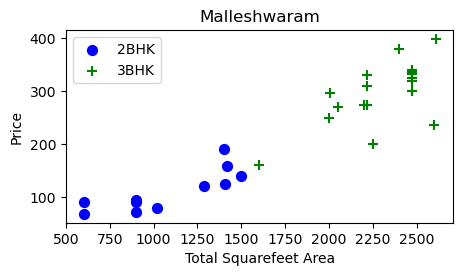

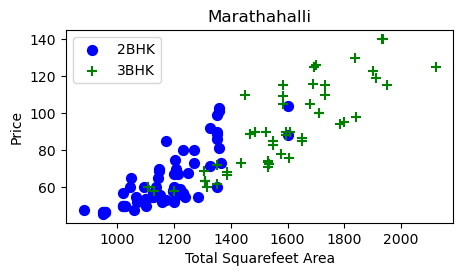

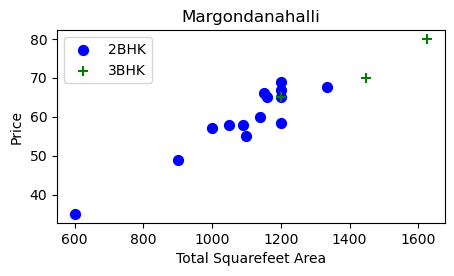

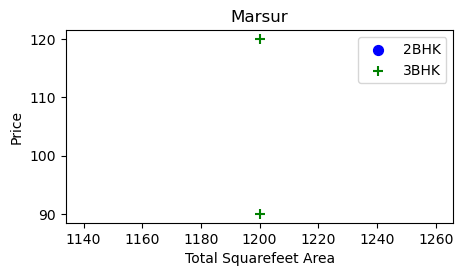

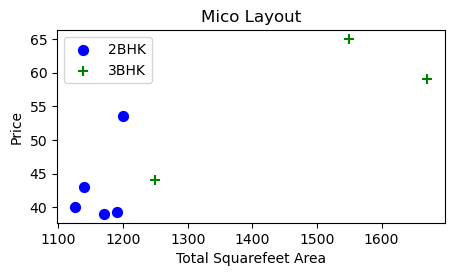

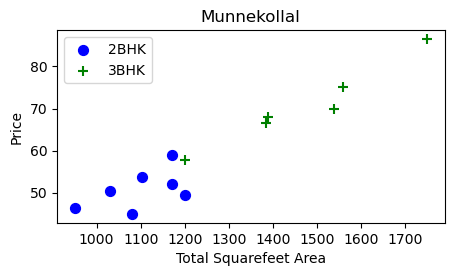

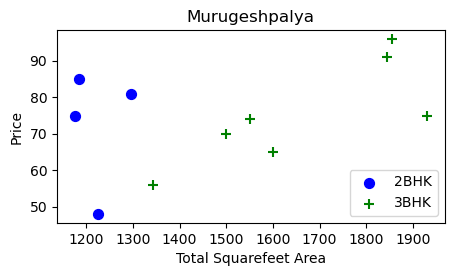

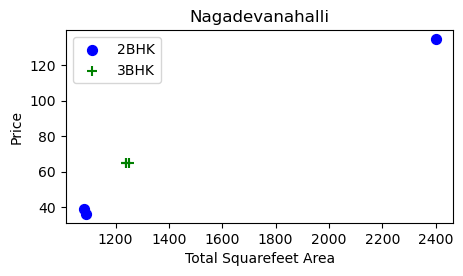

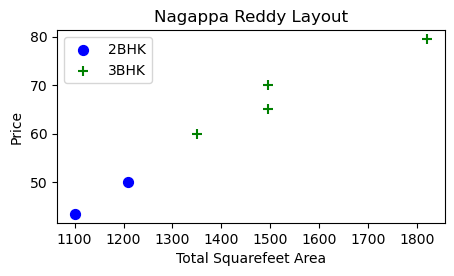

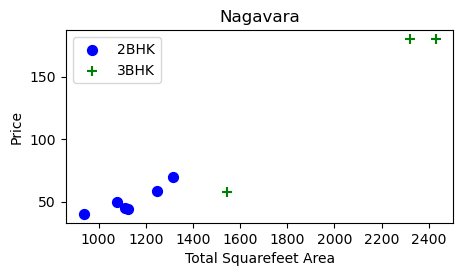

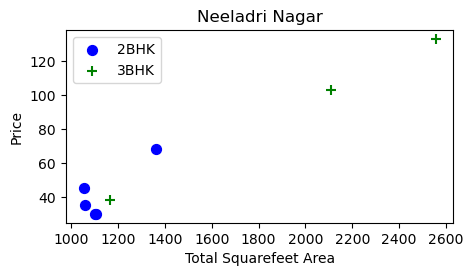

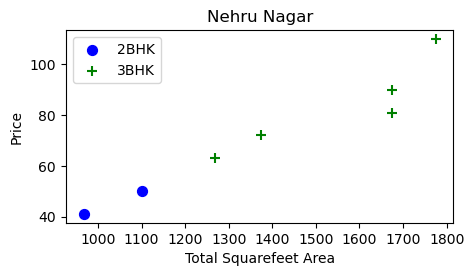

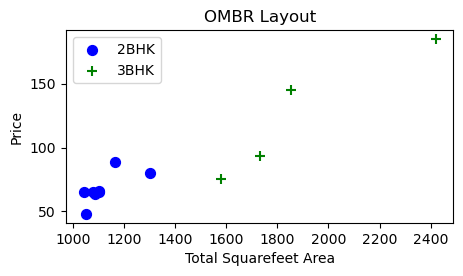

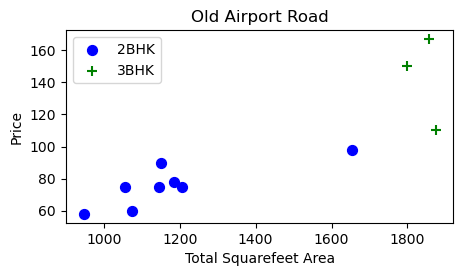

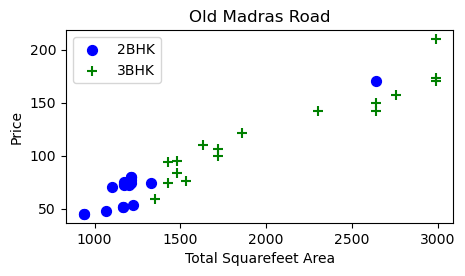

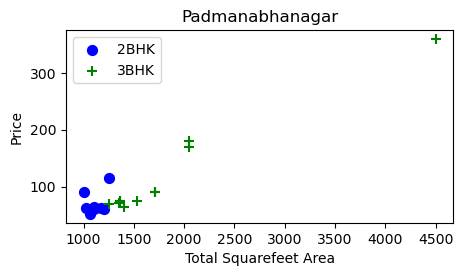

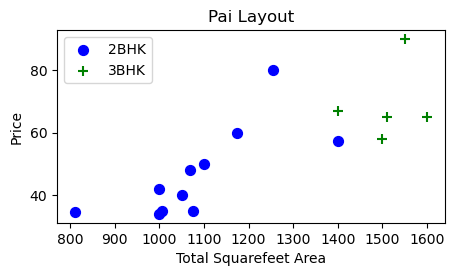

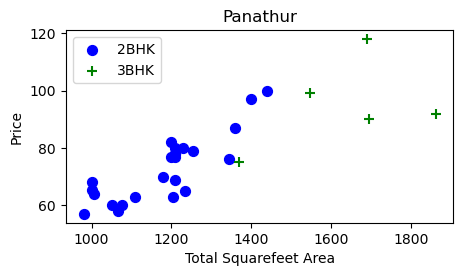

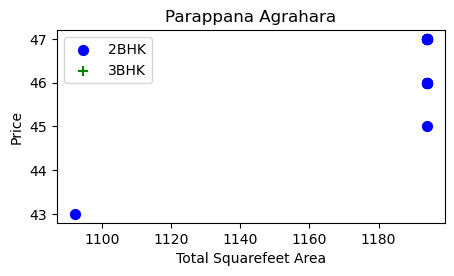

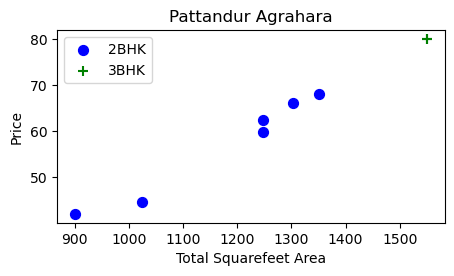

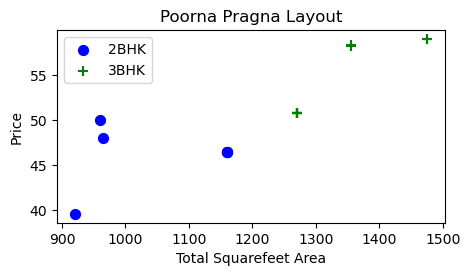

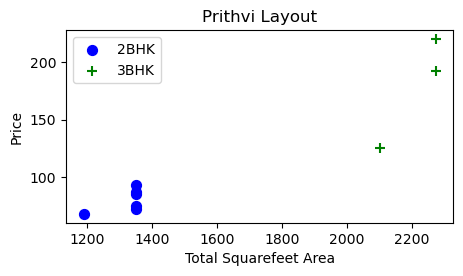

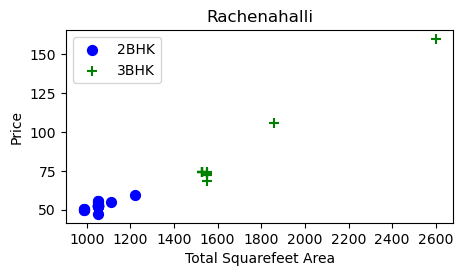

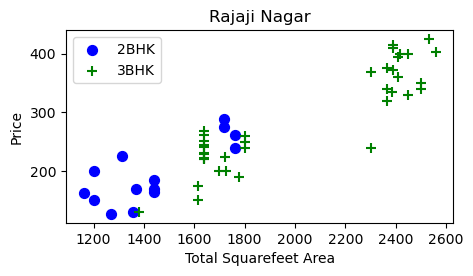

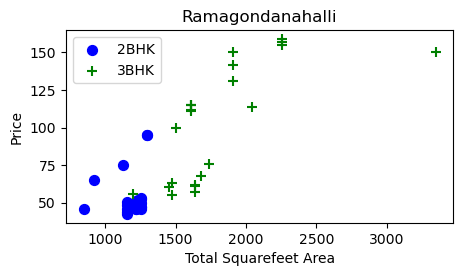

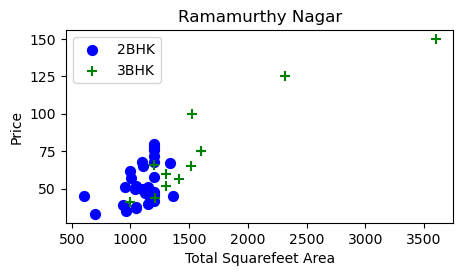

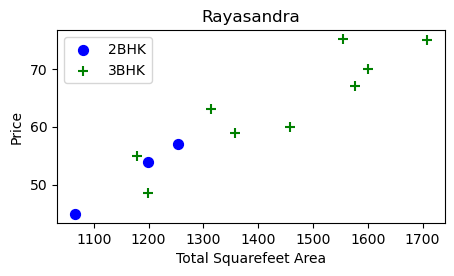

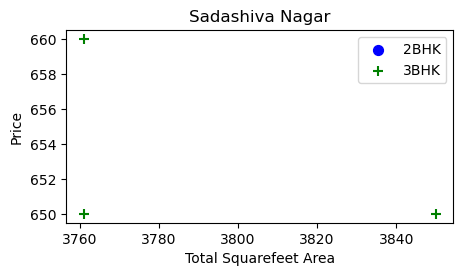

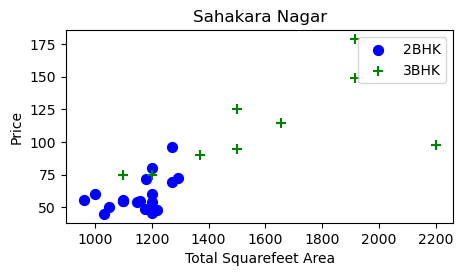

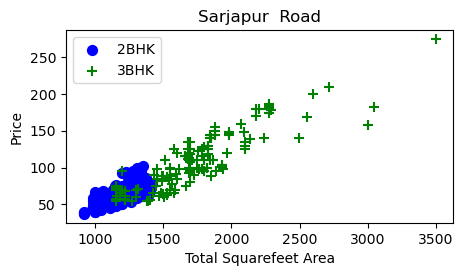

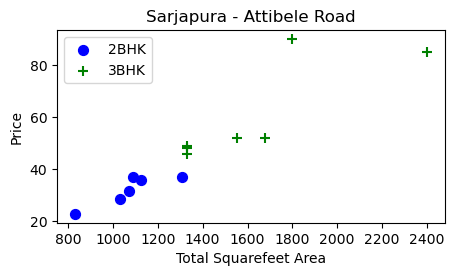

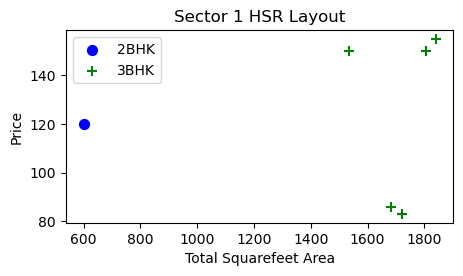

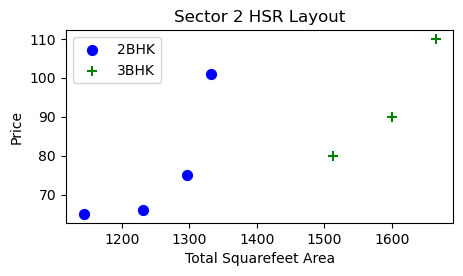

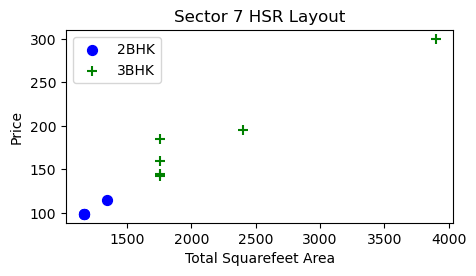

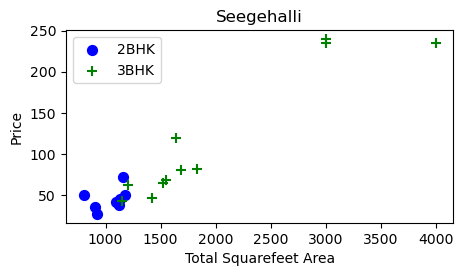

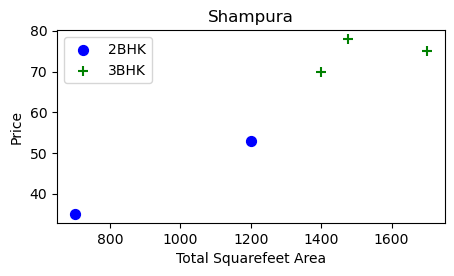

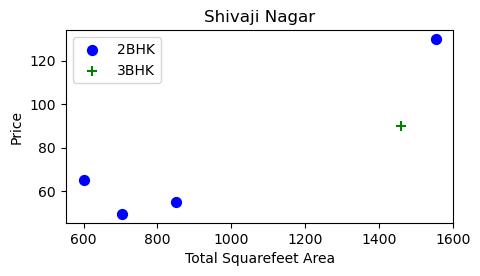

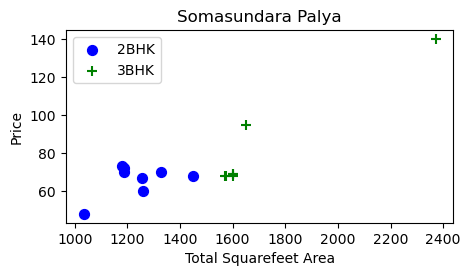

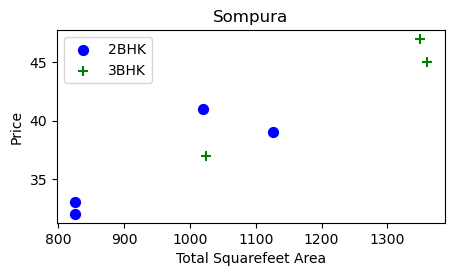

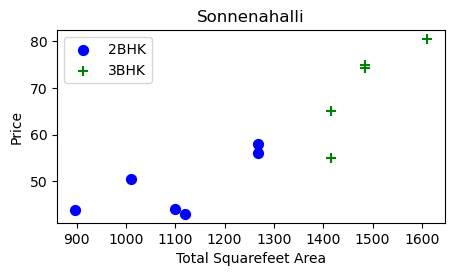

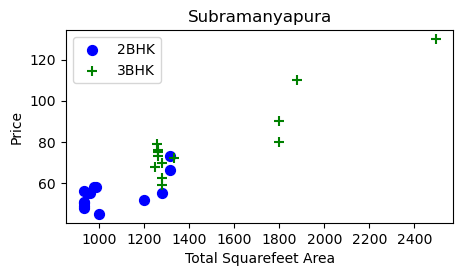

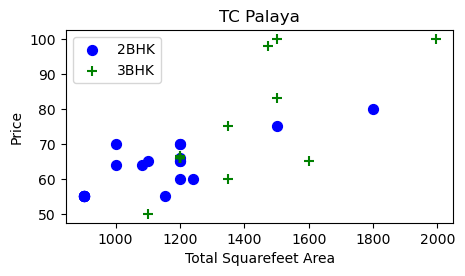

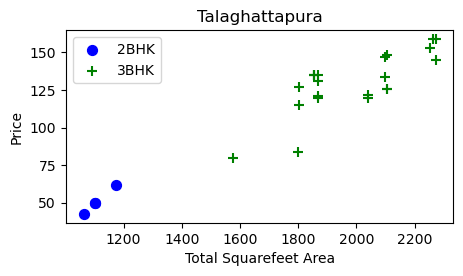

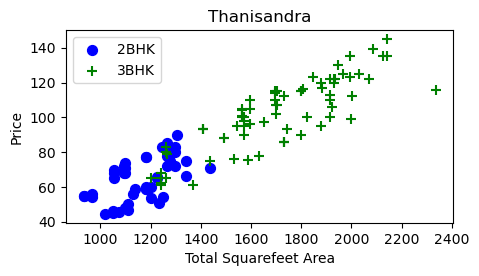

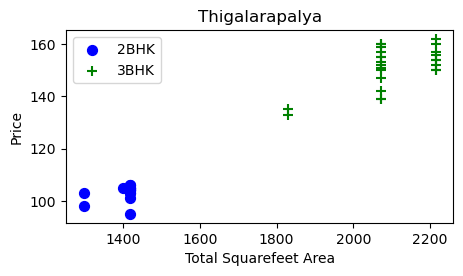

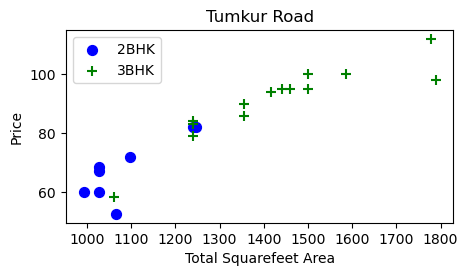

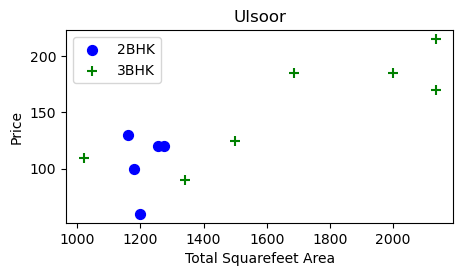

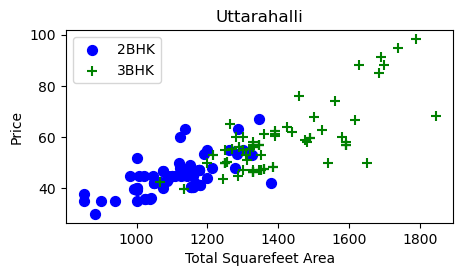

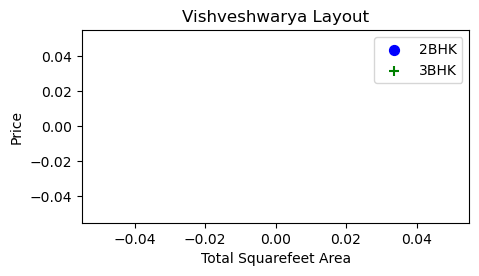

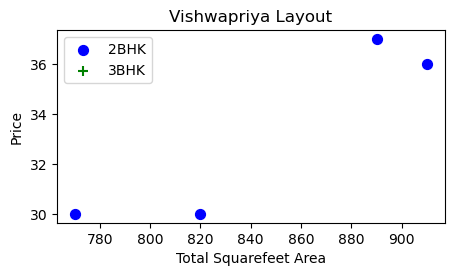

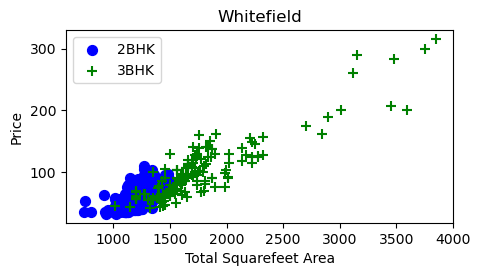

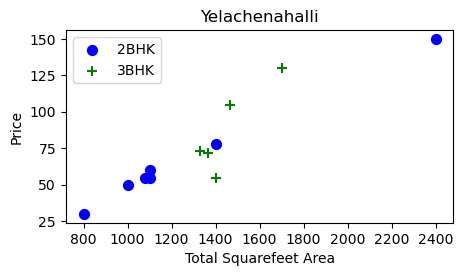

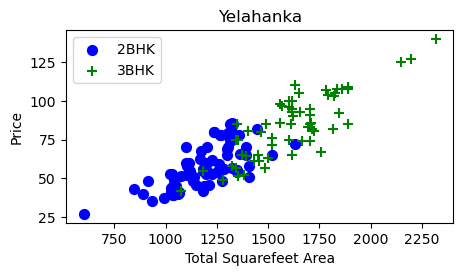

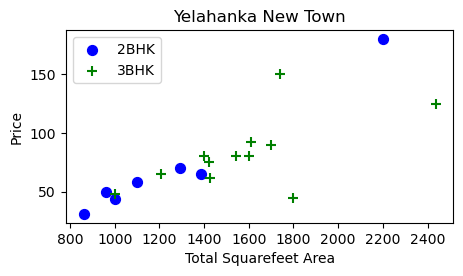

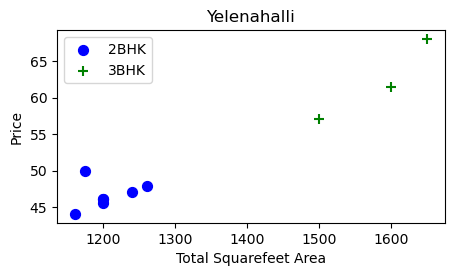

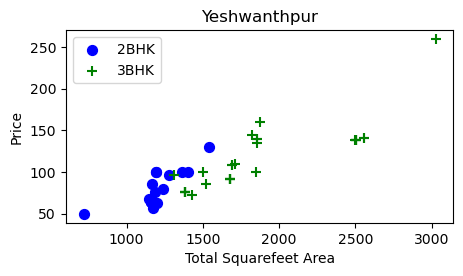

In [125]:
#Lets check other locations to
for location in df7.location.unique():
    plot_scatter_chart(df7, location)

In [126]:
#This function goup the data by the location
#Then calculate the mean, std, count for each BHK in that location
#Next remove any any property that values less than next lower bhk's mean value
#e.g: if a 2BHK property is less than the 1bhk mean value, it will be removed.
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

In [127]:
df8 = remove_bhk_outliers(df7)
df8

location       size total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK     2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK     1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK     1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK     1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK     1235.0   2.0  148.0    2   
...                    ...        ...        ...   ...    ...  ...   
10213                other      2 BHK     1200.0   2.0   70.0    2   
10214                other      1 BHK     1800.0   1.0  200.0    1   
10217                other      2 BHK     1353.0   2.0  110.0    2   
10218                other  1 Bedroom      812.0   1.0   26.0    1   
10221                other      4 BHK     3600.0   5.0  400.0    4   

      price_per_sqft  
0        15017.54386  
1       11901.840491  
2       12533.333333  
3       10833.333333  
4       11983.805668  
...              ...  
10213    5833.333333  
10214   11111.111111  
10217    8130.081301  
10218    3201.970443  
10221   11111.111111  

[7369 rows x 7 columns]

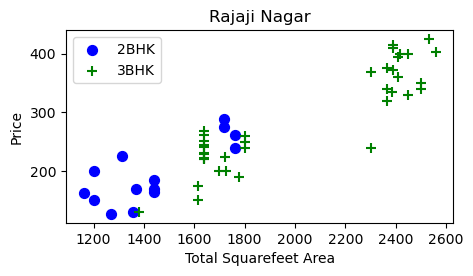

In [129]:
plot_scatter_chart(df7, 'Rajaji Nagar')
#Now most of the outliers looks like remoed from bhk

In [130]:
#Show nefore and after plots of the rajaji nagar

In [131]:
#Checkng the distribution of the price per sqft feature
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#It is skwed bell curve.

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

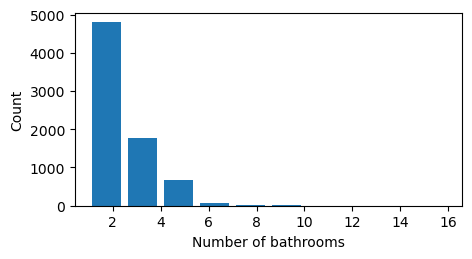

In [132]:
#Check the bathroom feature
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [133]:
#looks like There are properties that has more than 10 baths
df8[df8.bath>10]

location       size total_sqft  bath  price  bhk price_per_sqft
585    BTM 1st Stage  9 Bedroom     3300.0  14.0  500.0    9   15151.515152
5344  Neeladri Nagar     10 BHK     4000.0  12.0  160.0   10         4000.0
8547           other     10 BHK    12000.0  12.0  525.0   10         4375.0
8633           other     16 BHK    10000.0  16.0  550.0   16         5500.0
9329           other     11 BHK     6000.0  12.0  150.0   11         2500.0
9642           other     13 BHK     5425.0  13.0  275.0   13    5069.124424

In [134]:
#Here we see there are some properties that seems bit odd.
#Like the first 9bhk one with 14 baths. 
#These are outliers
#Any property which has +2 more baths than the bhk concider as an outlier here

#Here are the outliers
df8[df8.bath>df8.bhk+2]

location       size total_sqft  bath   price  bhk price_per_sqft
585   BTM 1st Stage  9 Bedroom     3300.0  14.0   500.0    9   15151.515152
1642  Chikkabanavar  4 Bedroom     2460.0   7.0    80.0    4     3252.03252
5305     Nagasandra  4 Bedroom     7000.0   8.0   450.0    4    6428.571429
6792    Thanisandra      3 BHK     1806.0   6.0   116.0    3     6423.03433
8476          other      6 BHK    11338.0   9.0  1000.0    6    8819.897689

In [135]:
#remove outliers form the bathroom column
df9 = df8[df8.bath<df8.bhk+2]
df9

location       size total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK     2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK     1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK     1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK     1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK     1235.0   2.0  148.0    2   
...                    ...        ...        ...   ...    ...  ...   
10213                other      2 BHK     1200.0   2.0   70.0    2   
10214                other      1 BHK     1800.0   1.0  200.0    1   
10217                other      2 BHK     1353.0   2.0  110.0    2   
10218                other  1 Bedroom      812.0   1.0   26.0    1   
10221                other      4 BHK     3600.0   5.0  400.0    4   

      price_per_sqft  
0        15017.54386  
1       11901.840491  
2       12533.333333  
3       10833.333333  
4       11983.805668  
...              ...  
10213    5833.333333  
10214   11111.111111  
10217    8130.081301  
10218    3201.970443  
10221   11111.111111  

[7291 rows x 7 columns]

In [136]:
#Finaly remove unnececery features.
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

location total_sqft  bath  price  bhk
0      1st Block Jayanagar     2850.0   4.0  428.0    4
1      1st Block Jayanagar     1630.0   3.0  194.0    3
2      1st Block Jayanagar     1875.0   2.0  235.0    3
3      1st Block Jayanagar     1200.0   2.0  130.0    3
4      1st Block Jayanagar     1235.0   2.0  148.0    2
...                    ...        ...   ...    ...  ...
10213                other     1200.0   2.0   70.0    2
10214                other     1800.0   1.0  200.0    1
10217                other     1353.0   2.0  110.0    2
10218                other      812.0   1.0   26.0    1
10221                other     3600.0   5.0  400.0    4

[7291 rows x 5 columns]